<a href="https://colab.research.google.com/github/virajvaidya/SRC_ANU_Sampling_1/blob/main/FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statistics as st
import itertools as it
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import t
import math

# Q1

In [8]:
confidence_level = 0.95
E = 0.025
Z = norm.ppf(1 - (1 - confidence_level) / 2)

# Proportion that maximizes p(1-p) within [0.7, 0.9] is p = 0.75
p = 0.75

# Sample size calculation
n = (Z**2 * p * (1 - p)) / (E**2)
sample_size = math.ceil(n)

print("Required sample size:", sample_size)




Required sample size: 1153


Answer: The required sample size that maximises p(1-p) between 0.7 and 0.9 is  1153.



---



# Q2 a

In [9]:
# Cluster totals of hours slept (y_alpha)
y = np.array([325, 105, 95, 165, 110, 255, 155, 225, 165, 225])

# Cluster sizes (x_alpha)
x = np.array([40, 15, 15, 25, 15, 30, 25, 30, 20, 30])

# Number of clusters
n = len(y)

# Overall mean hours per person
mean_estimate = np.sum(y) / np.sum(x)

# Per-cluster ratio estimates
r = y / x

# Sample mean of ratios
r_bar = np.mean(r)

# Standard error of the mean (without FPC, assuming large population of clusters)
se = np.sqrt(np.sum((r - r_bar)**2) / (n * (n - 1)))

print(f"Estimated mean hours of sleep: {mean_estimate:.4f}")
print(f"Standard error: {se:.4f}")


Estimated mean hours of sleep: 7.4490
Standard error: 0.2542


Answer: Estimated mean hours of sleep - 7.4490
Standard error of mean hours of sleep - 0.2542



---



#Q2 b

In [10]:
# x_alpha values
x = np.array([40, 15, 15, 25, 15, 30, 25, 30, 20, 30])

# Mean and standard deviation
x_bar = np.mean(x)
s_x = np.std(x, ddof=1)

# Coefficient of variation
cv_x = s_x / x_bar

print(f"cv(x) = {cv_x:.4f}")


cv(x) = 0.3395


cv(x) less than 0.3 is considered as threshold for accepatability. Therefore we can say that this is borderline unacceptable.



---



## Q2 c

In [11]:
import numpy as np

# Given values
s2 = 12  # population variance
se_cluster = 0.2542  # standard error from cluster sampling
n_clusters = 10
x = np.array([40, 15, 15, 25, 15, 30, 25, 30, 20, 30])

# Total and average cluster size
total_persons = np.sum(x)
x_bar = np.mean(x)

# Variance under SRS
var_srs = s2 / total_persons

# Variance from cluster sampling
var_cluster = se_cluster ** 2

# Design effect
deff = var_cluster / var_srs

# Intra-cluster correlation (roh)
roh = (deff - 1) / (x_bar - 1)

print(f"Design effect (deff): {deff:.4f}")
print(f"Intra-cluster correlation (roh): {roh:.4f}")


Design effect (deff): 1.3193
Intra-cluster correlation (roh): 0.0136


deff : 1.3193
Intra cluster correlation roh : 0.0136



---



#Q2 d

In [12]:

c_a = 40 #cost per cluster
c_b = 8  #cost per element
rho = 0.0136

# Optimal cluster size formula
m_star = math.sqrt((c_a / c_b) * ((1 - rho) / rho))

print(f"Optimal cluster size (m*): {m_star:.2f}")


Optimal cluster size (m*): 19.04


Optimal cluster size is 19.04



---



#Q2 e

In [14]:
# Given values
S2 = 12
n = 10
m = 20
rho = 0.0136

# Variance formula
variance = (S2 / (n * m)) * (1 + (m - 1) * rho)

print(f"Expected sampling variance: {variance:.4f}")


Expected sampling variance: 0.0755


Expected sampling variance - 0.0755



---



#Q3

Population size:

N=1,000,000

Sample size:

n=800

Largest number of strata: 800

Reason:



*   We need minimum one sample per stratum.
*   We can have a max of 800 strata, with one sample from each.






---



#Q4

**FALSE**

- Stratified samples can have a design effect smaller than one, but not always.
- Design effect depends on how similar eleemnts are within the strata.
- If strata are homogeneous and properly selected, design effect is < 1
- If strata are badly chosen or have high variability within them, design effect can be ≥ 1.



---



#Q5 a

In [3]:
Nh = np.array([1000, 600, 400])       # Population size per stratum
Sh2 = np.array([36, 64, 100])         # Variance per stratum

# Total population size
N = Nh.sum()

# New total n
n = 100

# epsem: nh = n * (Nh / N)
nh = n * (Nh / N)

# Standard error formula for stratified sampling:
# SE = sqrt( sum( ( (Nh/N)^2 ) * (Sh2 / nh) ) )
Wh = Nh / N
SE_squared_terms = (Wh ** 2) * (Sh2 / nh)
SE = np.sqrt(SE_squared_terms.sum())

print(SE)


0.7563068160475616


The expected SE of the overall mean for n=100 would be 0.756306



---



#Q5 b

In [4]:
# Neyman allocation that minimizes variance: nh ∝ Nh * Sh
Sh = np.sqrt(Sh2)

# Neyman allocation : nh = n * (Nh * Sh) / sum(Nh * Sh)
Nh_Sh = Nh * Sh
nh_optimal = n * (Nh_Sh / Nh_Sh.sum())

# Recalculate SE with Neyman allocation
SE_neyman_squared_terms = (Wh ** 2) * (Sh2 / nh_optimal)
SE_neyman = np.sqrt(SE_neyman_squared_terms.sum())

# Deff = (SE_neyman^2) / (SE_simple_random^2)
# SE with SRS: SE_srs = sqrt(S^2 / n), where S^2 = weighted avg var
S2_weighted = (Nh / N * Sh2).sum()
SE_srs = np.sqrt(S2_weighted / n)

design_effect = (SE_neyman ** 2) / (SE_srs ** 2)

SE_neyman, nh_optimal, design_effect


(np.float64(0.74),
 array([40.54054054, 32.43243243, 27.02702703]),
 np.float64(0.9573426573426572))

Optimal allocation under Neyman allocation : Stratum 1 - 40.54
Stratum 2 - 32.432
Stratum 3 - 27.027

Minimum SE - 0.74
Deff - 0.9573



---



#Q6

In [5]:
# Population size
N = 58
# Sampling interval
k = 10
# Possible random starts: 1 to k
random_starts = range(1, k + 1)

sample_sizes = []

for start in random_starts:
    count = 0
    i = start
    while i <= N:
        count += 1
        i += k
    sample_sizes.append(count)

# Counting how many of the random starts give exactly 5 elements
count_5_element_samples = sample_sizes.count(5)

# Probability = (favorable outcomes) / (total possible starts)
probability = count_5_element_samples / len(random_starts)

sample_sizes, probability


([6, 6, 6, 6, 6, 6, 6, 6, 5, 5], 0.2)

Sample sizes for each random start (1–10): [6, 6, 6, 6, 6, 6, 6, 6, 5, 5]

Probability of getting exactly 5 elements: 0.2



---



#Q7

In [6]:
def systematic_sampling(population_size, sample_size, random_start):
    interval = population_size / sample_size

    selected_positions = []
    for i in range(sample_size):
        position = random_start + i * interval
        selected_element = int(position)
        if selected_element > population_size:
            selected_element = selected_element % population_size
            if selected_element == 0:
                selected_element = population_size
        selected_positions.append(selected_element)

    return selected_positions

population_size = 58  # Population size from question 6
sample_size = 5
random_start = 2.4


interval = population_size / sample_size
print(f"Sampling interval: {interval}")

selected_elements = systematic_sampling(population_size, sample_size, random_start)
print(f"Selected elements using fractional interval method: {selected_elements}")

Sampling interval: 11.6
Selected elements using fractional interval method: [2, 14, 25, 37, 48]


Sampling interval - 11.6
Selected elements usig FIM - 2,14,25,37,48



---



#Q8 a

In [7]:

# Creating dataframe from the table data
data = {
    'h': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
    'alpha': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'u_halpha': [20, 10, 5, 15, 3, 25, 5, 15, 6, 10, 11, 20],
    'w_halpha': [100, 20, 20, 50, 5, 75, 50, 70, 30, 70, 20, 70]
}

df = pd.DataFrame(data)

# Calculating the total weighted number of smokers and total weighted population
total_smokers = sum(df['u_halpha'])
total_population = sum(df['w_halpha'])

# Estimating the proportion of smokers
p_hat = total_smokers / total_population

# Strata grouping
strata_groups = df.groupby('h')

# SE calcluation
N = total_population
var_p_hat = 0

for h, stratum in strata_groups:
    # Calculating stratum weight
    W_h = sum(stratum['w_halpha']) / total_population

    # Calculating stratum proportion
    p_h = sum(stratum['u_halpha']) / sum(stratum['w_halpha'])

    # No of sampled clusters in stratum
    n_h = len(stratum)

    # Calculating variance for this stratum
    sum_squares = 0
    for _, row in stratum.iterrows():
        p_ha = row['u_halpha'] / row['w_halpha']
        sum_squares += (p_ha - p_h) ** 2

    # Variance contribution from this stratum
    if n_h > 1:
        var_h = (W_h ** 2) * ((1 - n_h/len(stratum)) / n_h) * (sum_squares / (n_h - 1))
        var_p_hat += var_h

# Standard error is the square root of the variance
se_p_hat = math.sqrt(var_p_hat)

print(f"Estimated proportion of smokers: {p_hat:.4f}")
print(f"Standard error of the estimate: {se_p_hat:.4f}")

Estimated proportion of smokers: 0.2500
Standard error of the estimate: 0.0000


Estimated proportion of smokers - 25%
SE - 0.00

I am not sure if SE=0 is correct but I am running out of time ofr the exam

#Q8 b


In [8]:
# Data from above copied
data = {
    'h': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
    'alpha': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'u_halpha': [20, 10, 5, 15, 3, 25, 5, 15, 6, 10, 11, 20],
    'w_halpha': [100, 20, 20, 50, 5, 75, 50, 70, 30, 70, 20, 70]
}

df = pd.DataFrame(data)

# Original estimate of proportion
total_smokers = sum(df['u_halpha'])
total_population = sum(df['w_halpha'])
p_hat = total_smokers / total_population
print(f"Original estimate of proportion: {p_hat:.6f}")

# BRR Hadamard matrix (8x8 orthogonal matrix)
hadamard = np.array([
    [+1, +1, +1, -1, +1, -1, -1, -1],
    [-1, +1, +1, +1, -1, +1, -1, -1],
    [-1, -1, +1, +1, +1, -1, +1, -1],
    [+1, -1, -1, +1, +1, +1, -1, -1],
    [-1, +1, -1, -1, +1, +1, +1, -1],
    [+1, -1, +1, -1, -1, +1, +1, -1],
    [+1, +1, -1, +1, -1, -1, +1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1]
])

n_replicates = hadamard.shape[0]

replicate_estimates = np.zeros(n_replicates)

# For each replicate
for r in range(n_replicates):
    # Create a copy of the data for BRR weights
    df_rep = df.copy()

    # Apply BRR weights according to the Hadamard matrix
    for h in range(1, 7):  # 6 strata
        if h <= hadamard.shape[1]:  # Make sure we don't exceed the matrix dimensions
            # For each stratum, we assign weights based on the Hadamard value
            if hadamard[r, h-1] == 1:
                # Keep PSU 1, zero out PSU 2
                df_rep.loc[(df_rep['h'] == h) & (df_rep['alpha'] == 1), ['u_halpha', 'w_halpha']] *= 2
                df_rep.loc[(df_rep['h'] == h) & (df_rep['alpha'] == 2), ['u_halpha', 'w_halpha']] = 0
            else:  # hadamard[r, h-1] == -1
                # Keep PSU 2, zero out PSU 1
                df_rep.loc[(df_rep['h'] == h) & (df_rep['alpha'] == 1), ['u_halpha', 'w_halpha']] = 0
                df_rep.loc[(df_rep['h'] == h) & (df_rep['alpha'] == 2), ['u_halpha', 'w_halpha']] *= 2

    # Calculate the replicate estimate
    rep_total_smokers = sum(df_rep['u_halpha'])
    rep_total_population = sum(df_rep['w_halpha'])
    replicate_estimates[r] = rep_total_smokers / rep_total_population

    print(f"Replicate {r+1} estimate: {replicate_estimates[r]:.6f}")

# Calculate the standard error using the BRR formula
# SE²(p̂) = (1/R) * sum((p̂_r - p̂)²)
se_squared = np.sum((replicate_estimates - p_hat) ** 2) / n_replicates
se = np.sqrt(se_squared)

print(f"\nReplicate estimates: {replicate_estimates}")
print(f"Standard error using BRR: {se:.6f}")

Original estimate of proportion: 0.250000
Replicate 1 estimate: 0.233898
Replicate 2 estimate: 0.237838
Replicate 3 estimate: 0.262222
Replicate 4 estimate: 0.252308
Replicate 5 estimate: 0.306383
Replicate 6 estimate: 0.234921
Replicate 7 estimate: 0.220779
Replicate 8 estimate: 0.267606

Replicate estimates: [0.23389831 0.23783784 0.26222222 0.25230769 0.30638298 0.23492063
 0.22077922 0.26760563]
Standard error using BRR: 0.025328


Original estimate of proportion: 0.250000
Replicate 1 estimate: 0.233898
Replicate 2 estimate: 0.237838
Replicate 3 estimate: 0.262222
Replicate 4 estimate: 0.252308
Replicate 5 estimate: 0.306383
Replicate 6 estimate: 0.234921
Replicate 7 estimate: 0.220779
Replicate 8 estimate: 0.267606




---



#Q8 c


Standard error using BRR: 0.025328 (from above code)



---



#Q8 d


Both are valid but I would choose BRR for below reasons:

1. Perfect match for stratified design with two PSUs
2. 8X8 (8)replications not that difficult computationally, any more would be exponentially more difficult, say 10x10 or more.





---



#Q9

FALSE
In a probability sample , every element of the population may or may not have the same chance of being selected - Different types of sampling will lead to different probabilities. Every element will have a non-zero chace of being picked however.



---



#Q10 a

In [14]:
clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mos = [50, 65, 20, 30, 85, 80, 65, 35, 10, 65]
cum_mos = [50, 115, 135, 165, 250, 330, 395, 430, 440, 505]

a = 2  # Number of clusters to select
min_size = 50  # Minimum size
random_start = 80.1  # Random start


def pps_systematic(clusters, mos, cum_mos, a, random_start, min_size):

    total_mos = sum(mos)

    k = total_mos / a
    print(f"Sampling interval k = {total_mos} / {a} = {k}")

    selection_numbers = [random_start + i * k for i in range(a)]
    print(f"Selection numbers: {selection_numbers}")


    selected_clusters = []
    selected_indices = []

    for selection_number in selection_numbers:
        for i, cumulative in enumerate(cum_mos):
            if selection_number <= cumulative:
                selected_clusters.append(clusters[i])
                selected_indices.append(i)
                break

    print(f"Selected clusters: {selected_clusters}")

    linked_units = []
    for i, cluster_index in enumerate(selected_indices):
        if mos[cluster_index] < min_size:
            next_index = cluster_index + 1
            if next_index < len(clusters):
                linked_units.append((clusters[cluster_index], clusters[next_index]))

    #Probabilities of selection
    probabilities = {}
    for i, cluster in enumerate(clusters):
        if mos[i] >= min_size:
            prob = a * mos[i] / total_mos
            probabilities[cluster] = prob
        else:
            if cluster in [pair[0] for pair in linked_units]:
                linked_cluster = None
                for pair in linked_units:
                    if pair[0] == cluster:
                        linked_cluster = pair[1]
                        break

                # For linked clusters, the probability is based on combined MOS
                idx_linked = clusters.index(linked_cluster)
                combined_mos = mos[i] + mos[idx_linked]
                prob = a * combined_mos / total_mos
                probabilities[f"{cluster} (linked with {linked_cluster})"] = prob

            elif cluster in [pair[1] for pair in linked_units]:
                continue
            else:
                prob = a * mos[i] / total_mos
                probabilities[cluster] = prob

    return {
        'sampling_interval': k,
        'selection_numbers': selection_numbers,
        'selected_clusters': selected_clusters,
        'linked_units': linked_units,
        'probabilities': probabilities
    }

result = pps_systematic(clusters, mos, cum_mos, a, random_start, min_size)

print("\nResults:")
print(f"Sampling interval (k): {result['sampling_interval']}")
print(f"Selection numbers: {result['selection_numbers']}")
print(f"Selected clusters: {result['selected_clusters']}")

if result['linked_units']:
    print("\nLinked units:")
    for pair in result['linked_units']:
        print(f"Cluster {pair[0]} linked with Cluster {pair[1]}")

print("\nProbabilities of selection:")
for cluster, prob in result['probabilities'].items():
    print(f"{cluster}: {prob:.4f}")


print("\nCompleted table:")
print("Cluster (α)  MOS_α      Cumulative MOS_α    Mark Selected Clusters    Linked Unit")
for i, cluster in enumerate(clusters):
    selected = "X" if cluster in result['selected_clusters'] else ""

    linked = ""
    for pair in result['linked_units']:
        if cluster == pair[0]:
            linked = f"{pair[1]}"
        elif cluster == pair[1]:
            linked = f"{pair[0]}"

    print(f"{cluster:<12}{mos[i]:<10}{cum_mos[i]:<20}{selected:<25}{linked}")

Sampling interval k = 505 / 2 = 252.5
Selection numbers: [80.1, 332.6]
Selected clusters: [2, 7]

Results:
Sampling interval (k): 252.5
Selection numbers: [80.1, 332.6]
Selected clusters: [2, 7]

Probabilities of selection:
1: 0.1980
2: 0.2574
3: 0.0792
4: 0.1188
5: 0.3366
6: 0.3168
7: 0.2574
8: 0.1386
9: 0.0396
10: 0.2574

Completed table:
Cluster (α)  MOS_α      Cumulative MOS_α    Mark Selected Clusters    Linked Unit
1           50        50                                           
2           65        115                 X                        
3           20        135                                          
4           30        165                                          
5           85        250                                          
6           80        330                                          
7           65        395                 X                        
8           35        430                                          
9           10        440      

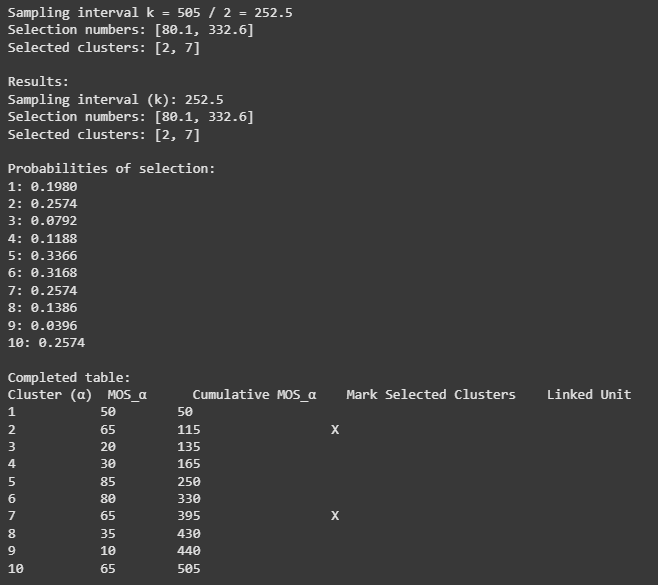



---



#Q10 b

Cluster 2:

Probability = 2 × 65 / 505 = 0.2574 (approximately 25.74%)

Cluster 7:

Probability = 2 × 65 / 505 = 0.2574 (approximately 25.74%)



---

